# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [85]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Create a new dataframe from your CSV
rat_df = pd.read_csv('Rat_Sightings.csv')
pd.set_option('display.max_columns', None)
rat_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,NaN,NaN,NaN,TRINITY PLACE,RECTOR STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,10/04/2015 03:01:02 PM,09/18/2015 12:00:00 AM,01 MANHATTAN,MANHATTAN,980656.0,197137.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,HYLAN BOULEVARD,NaN,NaN,NaN,NaN,LATLONG,STATEN ISLAND,NaN,NaN,Closed,10/04/2015 10:02:58 AM,10/28/2015 12:00:00 AM,Unspecified STATEN ISLAND,STATEN ISLAND,955207.0,148858.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,POST AVENUE,CARY AVENUE,GREENLEAF AVENUE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Assigned,10/04/2015 11:58:02 AM,09/04/2015 12:03:49 PM,01 STATEN ISLAND,STATEN ISLAND,949033.0,169278.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,SCHOLES STREET,HUMBOLDT STREET,BUSHWICK AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,10/04/2015 06:56:34 AM,09/14/2015 12:00:00 AM,01 BROOKLYN,BROOKLYN,1000550.0,197585.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,WALLACE AVENUE,BRADY AVENUE,LYDIG AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,10/04/2015 10:08:27 AM,09/22/2015 12:00:00 AM,11 BRONX,BRONX,1021648.0,250489.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


In [86]:
# Print out any information you need to understand your dataframe
print('The number of rows and columns are:','\n',rat_df.shape)
print('The data type for each column is:','\n',rat_df.dtypes,)
print('The number of unique values for each column is:','\n',rat_df.nunique())
print('\n','The number of null values for each column is','\n',rat_df.isnull().sum())

The number of rows and columns are: 
 (101914, 52)
The data type for each column is: 
 Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                     float64
Status                             object
Due Date                           object
Resolution Action Updated Date 

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

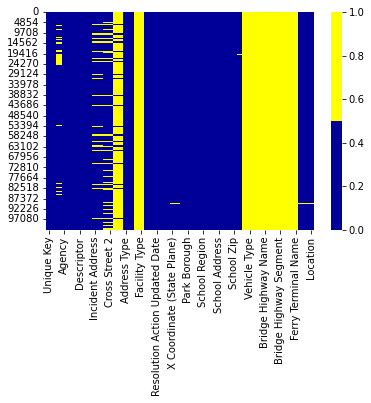

In [87]:
# Plot a heatmap of any missing data
cols = rat_df.columns[:52] # All 52 columns
colours = ['#000099', '#ffff00'] # yellow is missing. blue is not missing.
sns.heatmap(rat_df[cols].isnull(), cmap=sns.color_palette(colours))

In [88]:
# Try out a missing data percentage list! 
for col in rat_df.columns:
    pct_missing = np.mean(rat_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unique Key - 0%
Created Date - 0%
Closed Date - 11%
Agency - 0%
Agency Name - 0%
Complaint Type - 0%
Descriptor - 0%
Location Type - 0%
Incident Zip - 0%
Incident Address - 9%
Street Name - 9%
Cross Street 1 - 16%
Cross Street 2 - 16%
Intersection Street 1 - 91%
Intersection Street 2 - 91%
Address Type - 0%
City - 0%
Landmark - 100%
Facility Type - 100%
Status - 0%
Due Date - 0%
Resolution Action Updated Date - 0%
Community Board - 0%
Borough - 0%
X Coordinate (State Plane) - 1%
Y Coordinate (State Plane) - 1%
Park Facility Name - 0%
Park Borough - 0%
School Name - 0%
School Number - 0%
School Region - 0%
School Code - 0%
School Phone Number - 0%
School Address - 0%
School City - 0%
School State - 0%
School Zip - 0%
School Not Found - 1%
School or Citywide Complaint - 100%
Vehicle Type - 100%
Taxi Company Borough - 100%
Taxi Pick Up Location - 100%
Bridge Highway Name - 100%
Bridge Highway Direction - 100%
Road Ramp - 100%
Bridge Highway Segment - 100%
Garage Lot Name - 100%
Ferry Dire

created missing indicator for: Closed Date
created missing indicator for: Location Type
created missing indicator for: Incident Zip
created missing indicator for: Incident Address
created missing indicator for: Street Name
created missing indicator for: Cross Street 1
created missing indicator for: Cross Street 2
created missing indicator for: Intersection Street 1
created missing indicator for: Intersection Street 2
created missing indicator for: Address Type
created missing indicator for: City
created missing indicator for: Landmark
created missing indicator for: Facility Type
created missing indicator for: Due Date
created missing indicator for: Resolution Action Updated Date
created missing indicator for: X Coordinate (State Plane)
created missing indicator for: Y Coordinate (State Plane)
created missing indicator for: School Not Found
created missing indicator for: School or Citywide Complaint
created missing indicator for: Vehicle Type
created missing indicator for: Taxi Company 

<AxesSubplot:xlabel='index'>

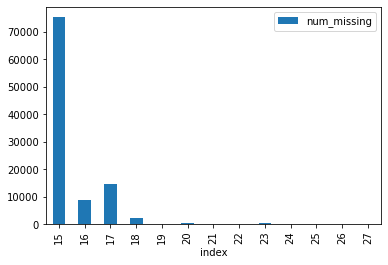

In [89]:
# Plot a missing data histogram

for col in rat_df.columns:
    missing = rat_df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        rat_df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in rat_df.columns if 'ismissing' in col]
rat_df['num_missing'] = rat_df[ismissing_cols].sum(axis=1)

rat_df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [90]:
# Handle any missing data in your dataframe
perc = 90.0
min_count =  int(((100-perc)/100)*rat_df.shape[0] + 1)
rat_df = rat_df.dropna( axis=1, 
                thresh=min_count)


In [91]:
pd.set_option('display.max_columns', None)
rat_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Closed Date_ismissing,Location Type_ismissing,Incident Zip_ismissing,Incident Address_ismissing,Street Name_ismissing,Cross Street 1_ismissing,Cross Street 2_ismissing,Intersection Street 1_ismissing,Intersection Street 2_ismissing,Address Type_ismissing,City_ismissing,Landmark_ismissing,Facility Type_ismissing,Due Date_ismissing,Resolution Action Updated Date_ismissing,X Coordinate (State Plane)_ismissing,Y Coordinate (State Plane)_ismissing,School Not Found_ismissing,School or Citywide Complaint_ismissing,Vehicle Type_ismissing,Taxi Company Borough_ismissing,Taxi Pick Up Location_ismissing,Bridge Highway Name_ismissing,Bridge Highway Direction_ismissing,Road Ramp_ismissing,Bridge Highway Segment_ismissing,Garage Lot Name_ismissing,Ferry Direction_ismissing,Ferry Terminal Name_ismissing,Latitude_ismissing,Longitude_ismissing,Location_ismissing,num_missing
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,NaN,NaN,NaN,INTERSECTION,NEW YORK,Closed,10/04/2015 03:01:02 PM,09/18/2015 12:00:00 AM,01 MANHATTAN,MANHATTAN,980656.0,197137.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)",False,False,False,True,True,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,17
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,HYLAN BOULEVARD,NaN,NaN,LATLONG,STATEN ISLAND,Closed,10/04/2015 10:02:58 AM,10/28/2015 12:00:00 AM,Unspecified STATEN ISLAND,STATEN ISLAND,955207.0,148858.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)",False,False,False,False,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,17
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,POST AVENUE,CARY AVENUE,GREENLEAF AVENUE,ADDRESS,STATEN ISLAND,Assigned,10/04/2015 11:58:02 AM,09/04/2015 12:03:49 PM,01 STATEN ISLAND,STATEN ISLAND,949033.0,169278.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)",True,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,16
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,SCHOLES STREET,HUMBOLDT STREET,BUSHWICK AVENUE,ADDRESS,BROOKLYN,Closed,10/04/2015 06:56:34 AM,09/14/2015 12:00:00 AM,01 BROOKLYN,BROOKLYN,1000550.0,197585.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)",False,False,False,False,False,F

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

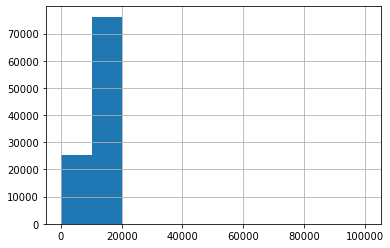

In [48]:
# Plot a histogram to see if there are any outliers.
rat_df['Incident Zip'].hist(bins=10)

<AxesSubplot:>

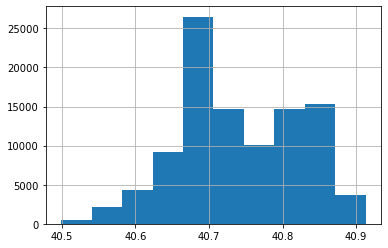

In [11]:
rat_df['Latitude'].hist(bins=10)

<AxesSubplot:>

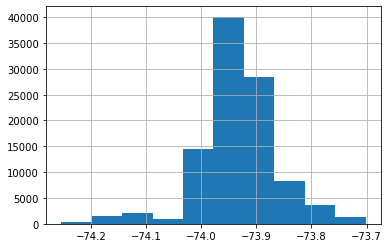

In [12]:
rat_df['Longitude'].hist(bins=10)

In [49]:
# Use the describe() method
rat_df['Incident Zip'].describe()

count    101578.000000
mean      10728.680895
std         631.206648
min          83.000000
25%       10086.250000
50%       10472.000000
75%       11222.000000
max      100354.000000
Name: Incident Zip, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


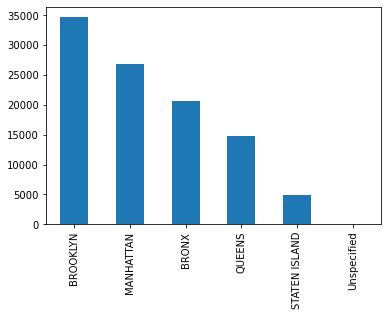

In [3]:
# Plot a bar chart
rat_df['Borough'].value_counts().plot.bar()

<AxesSubplot:>

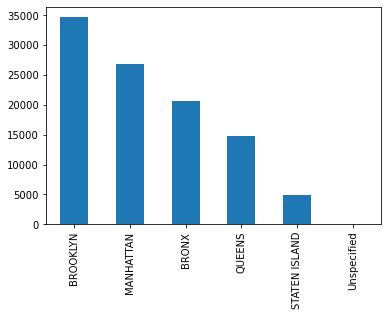

In [7]:
rat_df['Park Borough'].value_counts().plot.bar()

<AxesSubplot:>

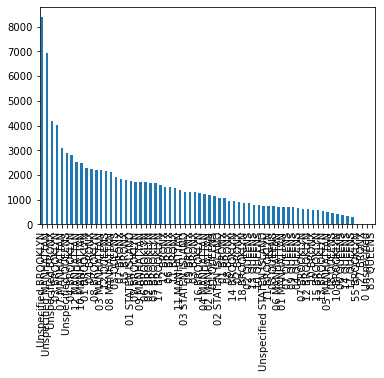

In [10]:
rat_df['Community Board'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [95]:
# Handle any outliers in your dataframe
rat_df['Incident Zip'] = rat_df['Incident Zip'].fillna(0)
rat_df['Incident Zip'] = rat_df['Incident Zip'].apply(np.int64)
rat_df['Incident Zip']=rat_df['Incident Zip'].astype(str)

#long_zip_codes = rat_df['Incident Zip'].str.len() > 5
#print(rat_df['Incident Zip'][long_zip_codes].unique())

rat_df.replace({
    'Incident Zip': {
        '100354': '10354'
    }
})




,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Closed Date_ismissing,Location Type_ismissing,Incident Zip_ismissing,Incident Address_ismissing,Street Name_ismissing,Cross Street 1_ismissing,Cross Street 2_ismissing,Intersection Street 1_ismissing,Intersection Street 2_ismissing,Address Type_ismissing,City_ismissing,Landmark_ismissing,Facility Type_ismissing,Due Date_ismissing,Resolution Action Updated Date_ismissing,X Coordinate (State Plane)_ismissing,Y Coordinate (State Plane)_ismissing,School Not Found_ismissing,School or Citywide Complaint_ismissing,Vehicle Type_ismissing,Taxi Company Borough_ismissing,Taxi Pick Up Location_ismissing,Bridge Highway Name_ismissing,Bridge Highway Direction_ismissing,Road Ramp_ismissing,Bridge Highway Segment_ismissing,Garage Lot Name_ismissing,Ferry Direction_ismissing,Ferry Terminal Name_ismissing,Latitude_ismissing,Longitude_ismissing,Location_ismissing,num_missing
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006,NaN,NaN,NaN,NaN,INTERSECTION,NEW YORK,Closed,10/04/2015 03:01:02 PM,09/18/2015 12:00:00 AM,01 MANHATTAN,MANHATTAN,980656.0,197137.0,MANHATTAN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)",False,False,False,True,True,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,17
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306,2270 HYLAN BOULEVARD,HYLAN BOULEVARD,NaN,NaN,LATLONG,STATEN ISLAND,Closed,10/04/2015 10:02:58 AM,10/28/2015 12:00:00 AM,Unspecified STATEN ISLAND,STATEN ISLAND,955207.0,148858.0,STATEN ISLAND,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)",False,False,False,False,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,17
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310,758 POST AVENUE,POST AVENUE,CARY AVENUE,GREENLEAF AVENUE,ADDRESS,STATEN ISLAND,Assigned,10/04/2015 11:58:02 AM,09/04/2015 12:03:49 PM,01 STATEN ISLAND,STATEN ISLAND,949033.0,169278.0,STATEN ISLAND,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)",True,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,16
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206,198 SCHOLES STREET,SCHOLES STREET,HUMBOLDT STREET,BUSHWICK AVENUE,ADDRESS,BROOKLYN,Closed,10/04/2015 06:56:34 AM,09/14/2015 12:00:00 AM,01 BROOKLYN,BROOKLYN,1000550.0,197585.0,BROOKLYN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)",False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,15
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462,2138 WALLACE AVENUE,WALLACE AVENUE,BRADY AVENUE,LYDIG AVENUE,ADDRESS,BRONX,Closed,10/04/2015 10:08:27 AM,09/22/2015 12:00:00 AM,11 BRONX,BRONX,1021648.0,250489.0,BRONX,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)",False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,True,True,Tru

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [93]:
# Look for any irrelevant data in the dataframe. How will you handle it?
# Dropped the following columns because every value said "Unspecified."
rat_df.drop(['Park Facility Name', 'School Name','School Number','School Region','School Code','School Phone Number','School Address','School City','School State','School Zip','School Not Found'], axis=1, inplace=True)


In [96]:
pd.set_option('display.max_columns', None)
rat_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Closed Date_ismissing,Location Type_ismissing,Incident Zip_ismissing,Incident Address_ismissing,Street Name_ismissing,Cross Street 1_ismissing,Cross Street 2_ismissing,Intersection Street 1_ismissing,Intersection Street 2_ismissing,Address Type_ismissing,City_ismissing,Landmark_ismissing,Facility Type_ismissing,Due Date_ismissing,Resolution Action Updated Date_ismissing,X Coordinate (State Plane)_ismissing,Y Coordinate (State Plane)_ismissing,School Not Found_ismissing,School or Citywide Complaint_ismissing,Vehicle Type_ismissing,Taxi Company Borough_ismissing,Taxi Pick Up Location_ismissing,Bridge Highway Name_ismissing,Bridge Highway Direction_ismissing,Road Ramp_ismissing,Bridge Highway Segment_ismissing,Garage Lot Name_ismissing,Ferry Direction_ismissing,Ferry Terminal Name_ismissing,Latitude_ismissing,Longitude_ismissing,Location_ismissing,num_missing
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006,NaN,NaN,NaN,NaN,INTERSECTION,NEW YORK,Closed,10/04/2015 03:01:02 PM,09/18/2015 12:00:00 AM,01 MANHATTAN,MANHATTAN,980656.0,197137.0,MANHATTAN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)",False,False,False,True,True,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,17
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306,2270 HYLAN BOULEVARD,HYLAN BOULEVARD,NaN,NaN,LATLONG,STATEN ISLAND,Closed,10/04/2015 10:02:58 AM,10/28/2015 12:00:00 AM,Unspecified STATEN ISLAND,STATEN ISLAND,955207.0,148858.0,STATEN ISLAND,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)",False,False,False,False,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,17
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310,758 POST AVENUE,POST AVENUE,CARY AVENUE,GREENLEAF AVENUE,ADDRESS,STATEN ISLAND,Assigned,10/04/2015 11:58:02 AM,09/04/2015 12:03:49 PM,01 STATEN ISLAND,STATEN ISLAND,949033.0,169278.0,STATEN ISLAND,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)",True,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,16
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206,198 SCHOLES STREET,SCHOLES STREET,HUMBOLDT STREET,BUSHWICK AVENUE,ADDRESS,BROOKLYN,Closed,10/04/2015 06:56:34 AM,09/14/2015 12:00:00 AM,01 BROOKLYN,BROOKLYN,1000550.0,197585.0,BROOKLYN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)",False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,15
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462,2138 WALLACE AVENUE,WALLACE AVENUE,BRADY AVENUE,LYDIG AVENUE,ADDRESS,BRONX,Closed,10/04/2015 10:08:27 AM,09/22/2015 12:00:00 AM,11 BRONX,BRONX,1021648.0,250489.0,BRONX,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)",False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,True,True,Tru

In [83]:
# Look for duplicates. How will you handle any duplicates?
#'Agency' and 'Agency Name' can be condensed to just 'Agency Name'; 'Complain Type' and 'Descriptor' can be combined, 'Community Board', 'Borough' and 'Park Borough' can be combined and X and Y Coordinates and Location can be combined.
num_rows = len(rat_df.index)
low_information_cols = [] #

for col in rat_df.columns:
    cnts = rat_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
        
rat_df['Borough'].equals(rat_df['Park Borough'])

Agency: 100.00000%
DOHMH    101914
Name: Agency, dtype: int64

Agency Name: 100.00000%
Department of Health and Mental Hygiene    101914
Name: Agency Name, dtype: int64

Complaint Type: 100.00000%
Rodent    101914
Name: Complaint Type, dtype: int64

Descriptor: 100.00000%
Rat Sighting    101914
Name: Descriptor, dtype: int64

Landmark: 99.96566%
NaN                                101879
J F K AIRPORT                           6
GRAND ARMY PLAZA                        3
WOODHULL MEDICAL CENTER                 3
BARCLAYS CENTER                         2
LA GUARDIA AIRPORT                      2
METROPOLITAN MUSEUM                     2
HUNTER COLLEGE                          2
PENNSYLVANIA STATION                    2
BRYANT PARK                             1
WORLDS FAIR MARINA                      1
LEHMAN COLLEGE                          1
FERRY TERMINAL                          1
BROOKLYN MUSEUM                         1
CITY HALL                               1
BKLYN BATTERY TUNNEL  

True

In [12]:
#Duplicate rows
rat_df_dedupped = rat_df.drop('Unique Key', axis=1).drop_duplicates()


print(rat_df.shape)
print(rat_df_dedupped.shape)

(101914, 26)
(101912, 25)


In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it


## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [105]:
# Try to convert all the strings in a column to lower or upper case. 
rat_df['Incident Address'].str.upper()
rat_df['Incident Address'] = rat_df['Incident Address'].str.replace('-','')


In [112]:
rat_df.iloc[:, 0:25]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006,NaN,NaN,NaN,NaN,INTERSECTION,NEW YORK,Closed,10/04/2015 03:01:02 PM,09/18/2015 12:00:00 AM,01 MANHATTAN,MANHATTAN,980656.0,197137.0,MANHATTAN,40.707772,-74.012963
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306,2270 HYLAN BOULEVARD,HYLAN BOULEVARD,NaN,NaN,LATLONG,STATEN ISLAND,Closed,10/04/2015 10:02:58 AM,10/28/2015 12:00:00 AM,Unspecified STATEN ISLAND,STATEN ISLAND,955207.0,148858.0,STATEN ISLAND,40.575209,-74.104547
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310,758 POST AVENUE,POST AVENUE,CARY AVENUE,GREENLEAF AVENUE,ADDRESS,STATEN ISLAND,Assigned,10/04/2015 11:58:02 AM,09/04/2015 12:03:49 PM,01 STATEN ISLAND,STATEN ISLAND,949033.0,169278.0,STATEN ISLAND,40.631236,-74.126878
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206,198 SCHOLES STREET,SCHOLES STREET,HUMBOLDT STREET,BUSHWICK AVENUE,ADDRESS,BROOKLYN,Closed,10/04/2015 06:56:34 AM,09/14/2015 12:00:00 AM,01 BROOKLYN,BROOKLYN,1000550.0,197585.0,BROOKLYN,40.708987,-73.941207
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462,2138 WALLACE AVENUE,WALLACE AVENUE,BRADY AVENUE,LYDIG AVENUE,ADDRESS,BRONX,Closed,10/04/2015 10:08:27 AM,09/22/2015 12:00:00 AM,11 BRONX,BRONX,1021648.0,250489.0,BRONX,40.854130,-73.864813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101909,35494908,02/15/2017 12:00:00 AM,01/31/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11207,2515 ATLANTIC AVENUE,ATLANTIC AVENUE,HINSDALE STREET,WILLIAMS AVENUE,ADDRESS,BROOKLYN,Pending,03/17/2017 12:14:24 AM,01/31/2017 12:00:00 AM,05 BROOKLYN,BROOKLYN,1011620.0,185444.0,BROOKLYN,40.675635,-73.901327
101910,35494944,02/14/2017 12:00:00 AM,02/23/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11233,829 HALSEY STREET,HALSEY STREET,NaN,NaN,LATLONG,BROOKLYN,Closed,03/16/2017 11:06:47 AM,02/23/2017 12:00:00 AM,Unspecified BROOKLYN,BROOKLYN,1006602.0,189042.0,BROOKLYN,40.685525,-73.919406
101911,35494945,02/14/2017 12:00:00 AM,02/16/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11213,98 ALBANY AVENUE,ALBANY AVENUE,ATLANTIC AVENUE,PACIFIC STREET,ADDRESS,BROOKLYN,Closed,03/16/2017 11:07:34 PM,02/16/2017 12:00:00 AM,08 BROOKLYN,BROOKLYN,1001259.0,186050.0,BROOKLYN,40.677325,-73.938679
101912,35494970,02/14/2017 12:00:00 AM,01/17/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11105,2268 46 STREET,46 STREET,DITMARS BOULEVARD,ASTORIA BOULEVARD,ADDRESS,Astoria,Pending,03/16/2017 05:28:53 PM,02/14/2017 05:38:57 PM,01 QUEENS,QUEENS,1010880.0,219521.0,QUEENS,40.769171,-73.903860
